# Kernel Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
np.random.seed(seed=1)

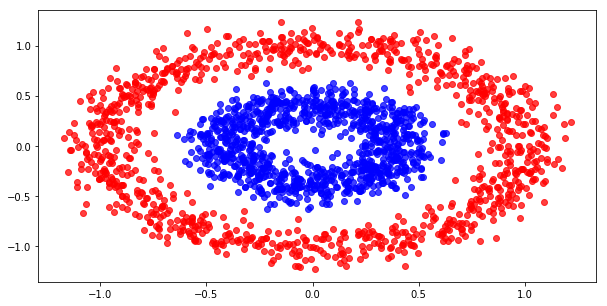

In [2]:
## Generate our dataset
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
plt.figure(figsize=(10,5))
plt.plot(X[y==0,0], X[y==0,1], "ro", alpha=0.75)
plt.plot(X[y==1,0], X[y==1,1], "bo", alpha=0.75)
plt.show()

In [3]:
def quadratic(X, xi):
    return ((1 + np.dot(X, xi))**2).reshape(len(X),1)

def rbf(X, xi, gamma = 0.1):
    xi = np.tile(xi, (X.shape[0], 1)) ## Construct an array by repeating A the number of times given by reps
    return np.exp(-gamma * np.linalg.norm(X - xi, axis = 1, keepdims = True)**2)

class KernelPerceptron(object):
    
    def __init__(self, kernel, iters=2):
        self.kernel = kernel
        self.iters = iters
    
    def fit(self, X, y):
        self.alpha = np.zeros(len(X))
        n_samples = len(X)

        for _ in range(self.iters):
            for i in range(n_samples):
                if y[i] * np.sum(self.alpha * y * self.kernel(X,X[i])) <= 0: ##Calculate errors by sample
                    self.alpha[i] += 1 
        
    def run(self, xi):
        return np.sum(self.alpha * y * self.kernel(X,xi))
    
    def predict(self, xi):
        ## Support vectors
        mask = self.alpha > 1e-5
        sv_alpha = self.alpha[mask]
        sv_x = X[mask]
        sv_y = y[mask]
        return np.sign(np.sum(self.alpha * y * self.kernel(X,xi)))

In [4]:
## Create objects
qua_clf = KernelPerceptron(quadratic,5)
rbf_clf = KernelPerceptron(rbf,5)

In [5]:
## Fit the model with quadratic polinomic function
qua_clf.fit(X,y)

In [6]:
## Fit the model with gaussian function
rbf_clf.fit(X,y)

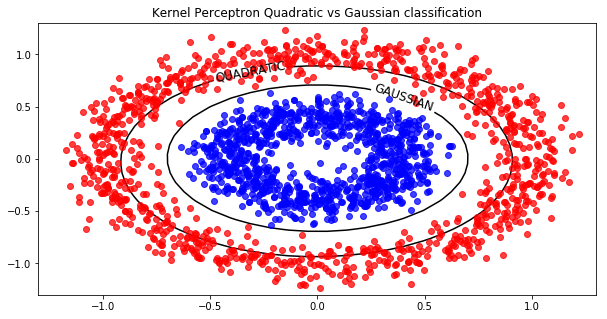

In [7]:
# Plot the resulting decision boundary
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X[y==0,0], X[y==0,1], "ro", alpha=0.75)
ax.plot(X[y==1,0], X[y==1,1], "bo", alpha=0.75)

# Generate a grid over the input space
X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,30), np.linspace(-1.3,1.3,30))

## Get Z array for plotting
def get_z(f):
    Z = np.zeros(X1.shape)
    for i in range(len(X1)):
        for j in range(len(X1)):
            as_array = np.asarray([X1[i,j],X2[i,j]])
            Z[i,j] = eval(f+"_clf.run")(as_array)
    return Z

CS1 = ax.contour(X1, X2, get_z("rbf"), 0, colors="k")
CS2 = ax.contour(X1, X2, get_z("qua"), 0, colors="k")
ax.set_title("Kernel Perceptron Quadratic vs Gaussian classification")
ax.clabel(CS1, CS1.levels, inline=True, fmt="GAUSSIAN", fontsize=12)
ax.clabel(CS2, CS2.levels, inline=True, fmt="QUADRATIC", fontsize=12)
plt.show()